## Solution de référence
***
<br>

# ITSMO > Analyse des signaux

## Transformée de Fourier
La transformée de Fourier d'un signal temporel donne accès à sa représentation fréquentielle, également appelée spectre. Son intêret est de permettre l'analyse de certains éléments qu'il n'est pas possible de déterminer directement sur une représentation temporelle, telle que des limites, présences, ou absences de fréquences (ou de bandes de fréquences).

Définition de la transformée de Fourier d'un signal continu $x(t)$ : $X(\nu) \propto \int_{-\infty}^{+\infty} x(t) \cdot e^{-i2\pi \nu t} \cdot dt$. L'opérateur proportionnel ($\propto$) indique qu'il peut exister un coefficient de normalisation selon le contexte, ce qui a peu d'importance en pratique car ce sont surtout les rapports d'amplitude qui importent.

Définition de la transformée de Fourier d'un signal discret $x(k)$ de longueur N : $X(n) \propto \sum_{k=0}^{N-1} x(k) \cdot e^{-i2\pi k \frac{n}{N}}$. 
<br>Le signal $x(k)$ est connu pour des temps $t = k\cdot Te$ avec $k \in [0, N-1]$.
<br>Le spectre $X(n)$ est connu pour des fréquences $\nu = n \cdot \frac{\nu e}{N}$ avec $n \in [0, N-1]$.

### Transformée de Fourier d'un signal réel mesuré n°1
Soit un signal de mesure de vitesse $V$ (transmis par la sonde Viking1 en 1976 depuis la surface de Mars), échantillonné à la fréquence $\nu e = 2.78\times 10^{-4} Hz$ (une mesure par heure) et enregistré dans un fichier de données. 

> Exécutez le code ci-dessous.

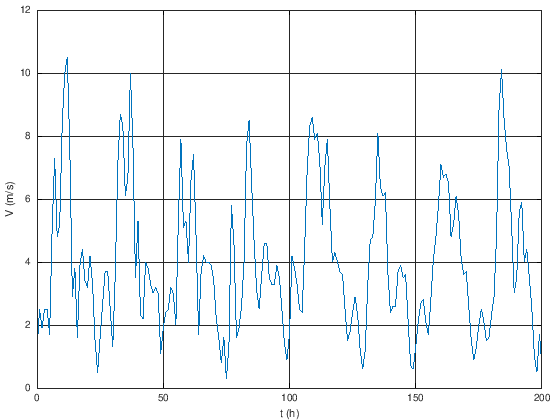

In [13]:
% Chargement des données (enregistrées à la fréquence de 2.78e-4 Hz dans le fichier "viking1.mat")
clear all
load('data/viking1.mat');
N = length(V);
t = t/3600; % Convertit le temps en heures pour la représentation graphique

% Tracé
plot(t,V)
xlim([0 200]); grid
xlabel('t (h)');
ylabel('V (m/s)')

Le signal $V$ est nettement quasi-périodique, caractéristique qui doit apparaître sur sa transformée de Fourier.
> Calculez la transformée de Fourier de $V$ en utilisant la fonction `fft`, puis tracez son module (fonction `abs`) en fonction de la fréquence. Pour cela vous devrez construire un vecteur de fréquences $\nu$, soit à l'aide de la fonction `linspace`, soit à l'aide de l'opérateur `:`.
><br> Vous pouvez afficher le module de la transformée de Fourier seulement sur l'intervale $[0,\nu e/2] Hz$, à l'aide de la fonction `xlim`.

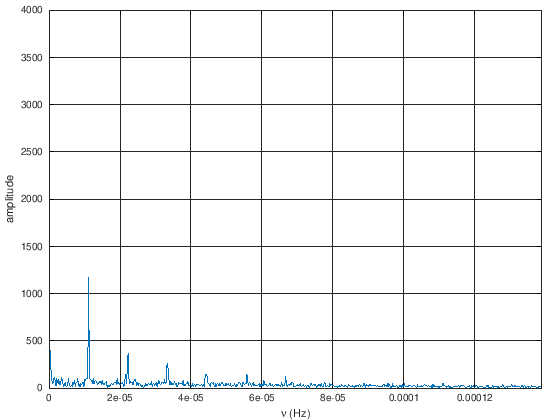

In [14]:
% Calcul de la transformée de Fourier
x = fft(V);
nue = 1/3600;
nu = linspace(0,(N-1)*nue/N,N);

% Tracé
plot(nu,abs(x))
xlim([0, nue/2]); grid
xlabel('\nu (Hz)');
ylabel('amplitude');

### Transformée de Fourier d'un signal réel mesuré n°2
Soit un signal de mesure de température $Tx$ (salle de travaux pratiques ENSCBP) échantillonné à la fréquence $\nu e = 1 Hz$ et enregistré dans un fichier de données.
> Exécutez le code ci-dessous.

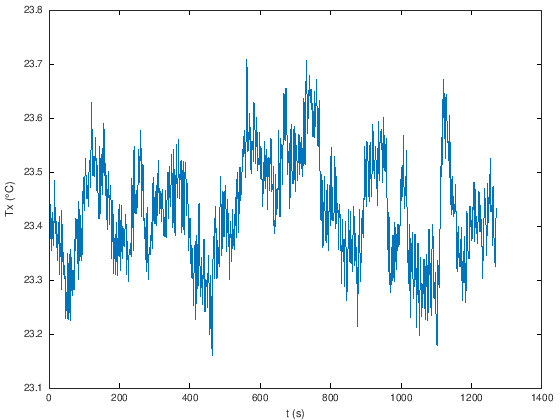

In [15]:
% Chargement du signal mesuré (enregistré à la fréquence de 1 Hz dans le fichier "Tx.mat")
load('data/Tx.mat');
N = length(Tx);

% Tracé
plot(t,Tx)
xlabel('t (s)');
ylabel('Tx (\degC)')

Le signal $Tx$ peut être partiellement déterministe, partiellement périodique, partiellement aléatoire, et sa transformée de Fourier peut donc en présenter les caractéristiques.
> Calculez la transformée de Fourier de $Tx$ en utilisant la fonction `fft`, puis tracez son module (fonction `abs`) en fonction de la fréquence. Pour cela vous devrez construire un vecteur de fréquences $\nu$, soit à l'aide de la fonction `linspace`, soit à l'aide de l'opérateur `:`.
><br> Vous pouvez afficher le module de la transformée de Fourier seulement sur l'intervale $[0,\nu e/2] Hz$, à l'aide de la fonction `xlim`.

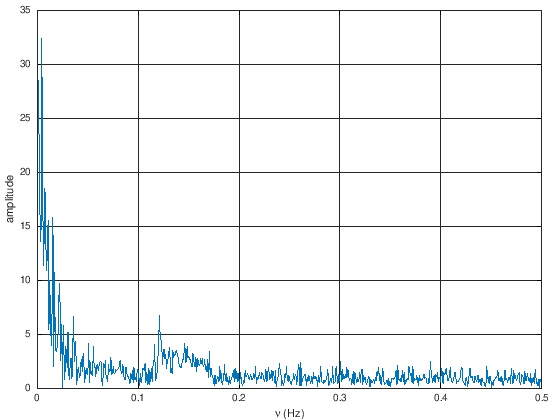

In [16]:
% Calcul de la transformée de Fourier
x = fft(Tx-mean(Tx));
nue = 1;
nu = linspace(0,(N-1)*nue/N,N);

% Tracé
plot(nu,abs(x))
xlim([0, nue/2]); grid
xlabel('\nu (Hz)');
ylabel('amplitude');

## Densité spectrale de puissance
La densité spectrale de puissance est une représentation fréquentielle pratique d'un signal temporel, car toujours réelle et positive, proportionnelle au carré du module de sa transformée de Fourier. Par contre elle ne contient aucune information sur la phase du signal (contrairement à la transformée de Fourier).

Définition de la densité spectrale de puissance d'un signal continu $x(t)$ de spectre $X(\nu)$ : $DSP(\nu) \propto |X(\nu)|^2$. L'opérateur proportionnel ($\propto$) indique qu'il peut exister un coefficient de normalisation selon le contexte, ce qui a peu d'importance en pratique car ce sont surtout les rapports d'amplitude qui importent.

Définition de la densité spectrale de puissance d'un signal discret $x(k)$ de longueur N : $DSP(n) \propto |X(n)|^2$. 
<br>Le signal $x(k)$ est connu pour des temps $t = k\cdot Te$ avec $k \in [0, N-1]$.
<br>La densité spectrale de puissance $DSP(n)$ est connue pour des fréquences $\nu = n \cdot \frac{\nu e}{N}$ avec $n \in [0, N-1]$.

### Densité spectrale de puissance d'un signal réel mesuré n°1
Soit un signal de mesure de vitesse $V$ (transmis par la sonde Viking1 en 1976 depuis la surface de Mars), échantillonné à la fréquence $\nu e = 2.78\times 10^{-4} Hz$ (une mesure par heure) et enregistré dans un fichier de données. 

> Calculez la densité spectrale de puissance de $V$ en utilisant la fonction `pwelch` (méthode de Welch), puis tracez-la en fonction de la fréquence.
><br> Vous pouvez faire varier les paramètres de la méthode de Welch correspondant à la taille des fenêtres et à leur taux de recouvrement.

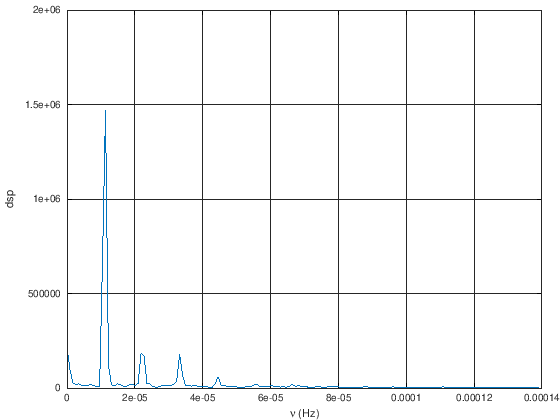

In [17]:
% Calcul de la densité spectrale de puissance
nue = 1/3600;
[p,nu] = pwelch(V,round(length(V)/4),0.5,[],nue);

% Tracé
plot(nu,p)
grid
xlabel('\nu (Hz)');
ylabel('dsp');

### Densité spectrale de puissance d'un signal réel mesuré n°2
Soit un signal de mesure de température $Tx$ (salle de travaux pratiques ENSCBP) échantillonné à la fréquence $\nu e = 1 Hz$ et enregistré dans un fichier de données.

> Calculez la densité spectrale de $Tx$ en utilisant la fonction `pwelch` (méthode de Welch), puis tracez-la en fonction de la fréquence.
><br> Vous pouvez faire varier les paramètres de la méthode de Welch correspondant à la taille des fenêtres et à leur taux de recouvrement.

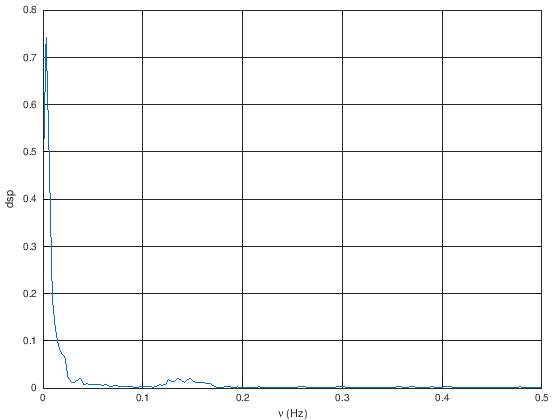

In [18]:
% Calcul de la densité spectrale de puissance
nue = 1;
[p,nu] = pwelch(Tx-mean(Tx),round(length(V)/4),0.5,[],nue);

% Tracé
plot(nu,p)
grid
xlabel('\nu (Hz)');
ylabel('dsp');